In [152]:
import torch as th
import timm
import urllib
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform
import numpy as np
import pandas as pd
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

In [164]:
m = timm.create_model('efficientnet_b0', pretrained=True)
m.reset_classifier(0)
_ = m.eval()

# o = m(th.randn(2, 3, 224, 224))

In [155]:
config = resolve_data_config({}, model=m)
print(config)
config["crop_pct"] = 0.5
print(config)
transform = create_transform(**config)

{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.875, 'crop_mode': 'center'}
{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.5, 'crop_mode': 'center'}


In [156]:
with th.no_grad():
    out = m(tensor)
print(out.shape)


torch.Size([20, 1280])


In [160]:
filename="/home/oscar/workspace/plane_follow/blender/test0/output/imgs/{:04d}.jpeg"
tensor = th.stack([transform(Image.open(filename.format(i)).convert('RGB')) for i in range(24)]) # .unsqueeze(0) # transform and add batch dimension
print(tensor.shape)

torch.Size([24, 3, 224, 224])


In [161]:
quat_path = "/home/oscar/workspace/plane_follow/blender/test0/output/labels.csv"
quat_df = pd.read_csv(quat_path)
xyzw_quat = quat_df[["x", "y", "z", "w"]].head(24).to_numpy()

rots = Rotation.from_quat(xyzw_quat)
mats = rots.inv().as_matrix().reshape((-1, 9))

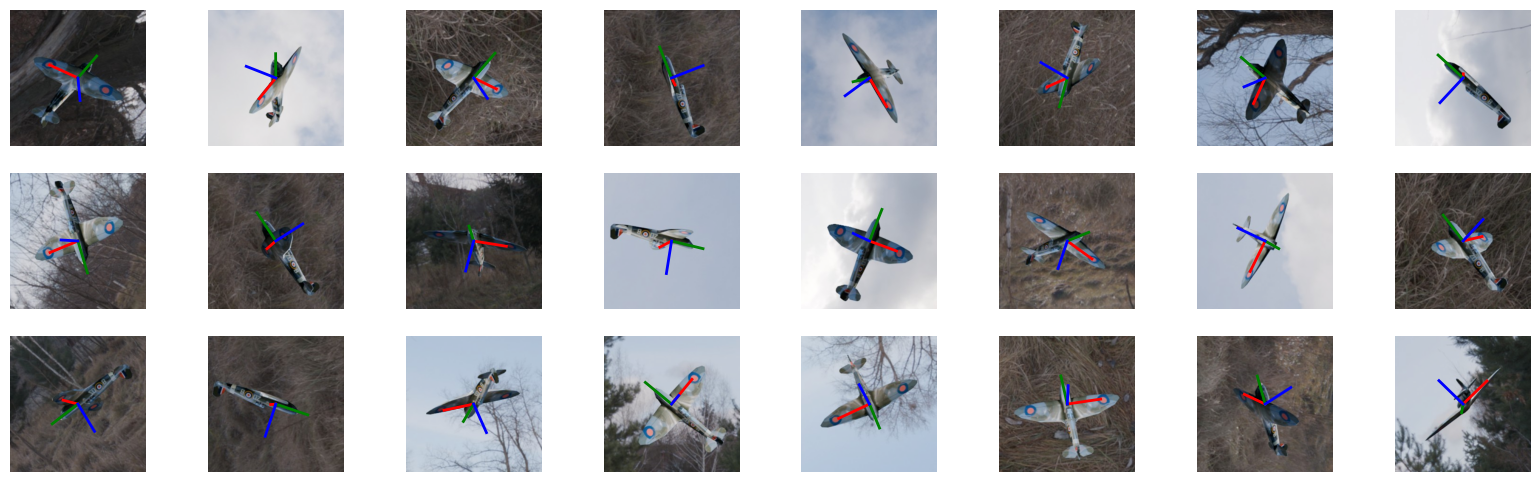

In [162]:

fig, axes = plt.subplots(3, 8, figsize=(20, 6))
plot_images(axes, tensor, config=config)
plot_base(axes, mats)
plt.show()